In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [3]:
# ID: ID of each client
# LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
# SEX: Gender (1=male, 2=female)
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
# MARRIAGE: Marital status (1=married, 2=single, 3=others)
# AGE: Age in years
# PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
# PAY_2: Repayment status in August, 2005 (scale same as above)
# PAY_3: Repayment status in July, 2005 (scale same as above)
# PAY_4: Repayment status in June, 2005 (scale same as above)
# PAY_5: Repayment status in May, 2005 (scale same as above)
# PAY_6: Repayment status in April, 2005 (scale same as above)
# BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
# BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
# BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
# BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
# BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
# BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
# PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
# PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
# PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
# PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
# PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
# PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
# default.payment.next.month: Default payment (1=yes, 0=no)

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [8]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
df = df.copy()

In [10]:
df.rename(columns={'default.payment.next.month': 'Default'}, inplace=True)

In [11]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [12]:
df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 5:4, 6:4})

In [13]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [14]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [15]:
df['SEX'] = df['SEX'].replace({1: 'male', 2: 'female'})
df['EDUCATION'] = df['EDUCATION'].replace({1: 'graduate', 2: 'university', 3: 'high school', 4: 'others'})
df['MARRIAGE'] = df['MARRIAGE'].replace({1: 'married', 2: 'single', 0: 'others' , 3: 'others'})

In [16]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000.0,female,university,married,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [17]:
df['MARRIAGE'].value_counts()

MARRIAGE
single     15964
married    13659
others       377
Name: count, dtype: int64

In [18]:
df['PAY_0'].value_counts()

PAY_0
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

In [19]:
y_count = df['Default'].value_counts()
y_count

Default
0    23364
1     6636
Name: count, dtype: int64

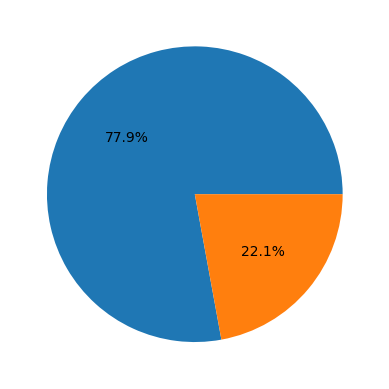

In [20]:
plt.pie(y_count, autopct='%1.1f%%')
plt.show()

In [21]:
numerical_cols = df.select_dtypes(np.number).columns
num_cols = ['LIMIT_BAL', 'AGE', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
cat_cols = df.select_dtypes('object').columns

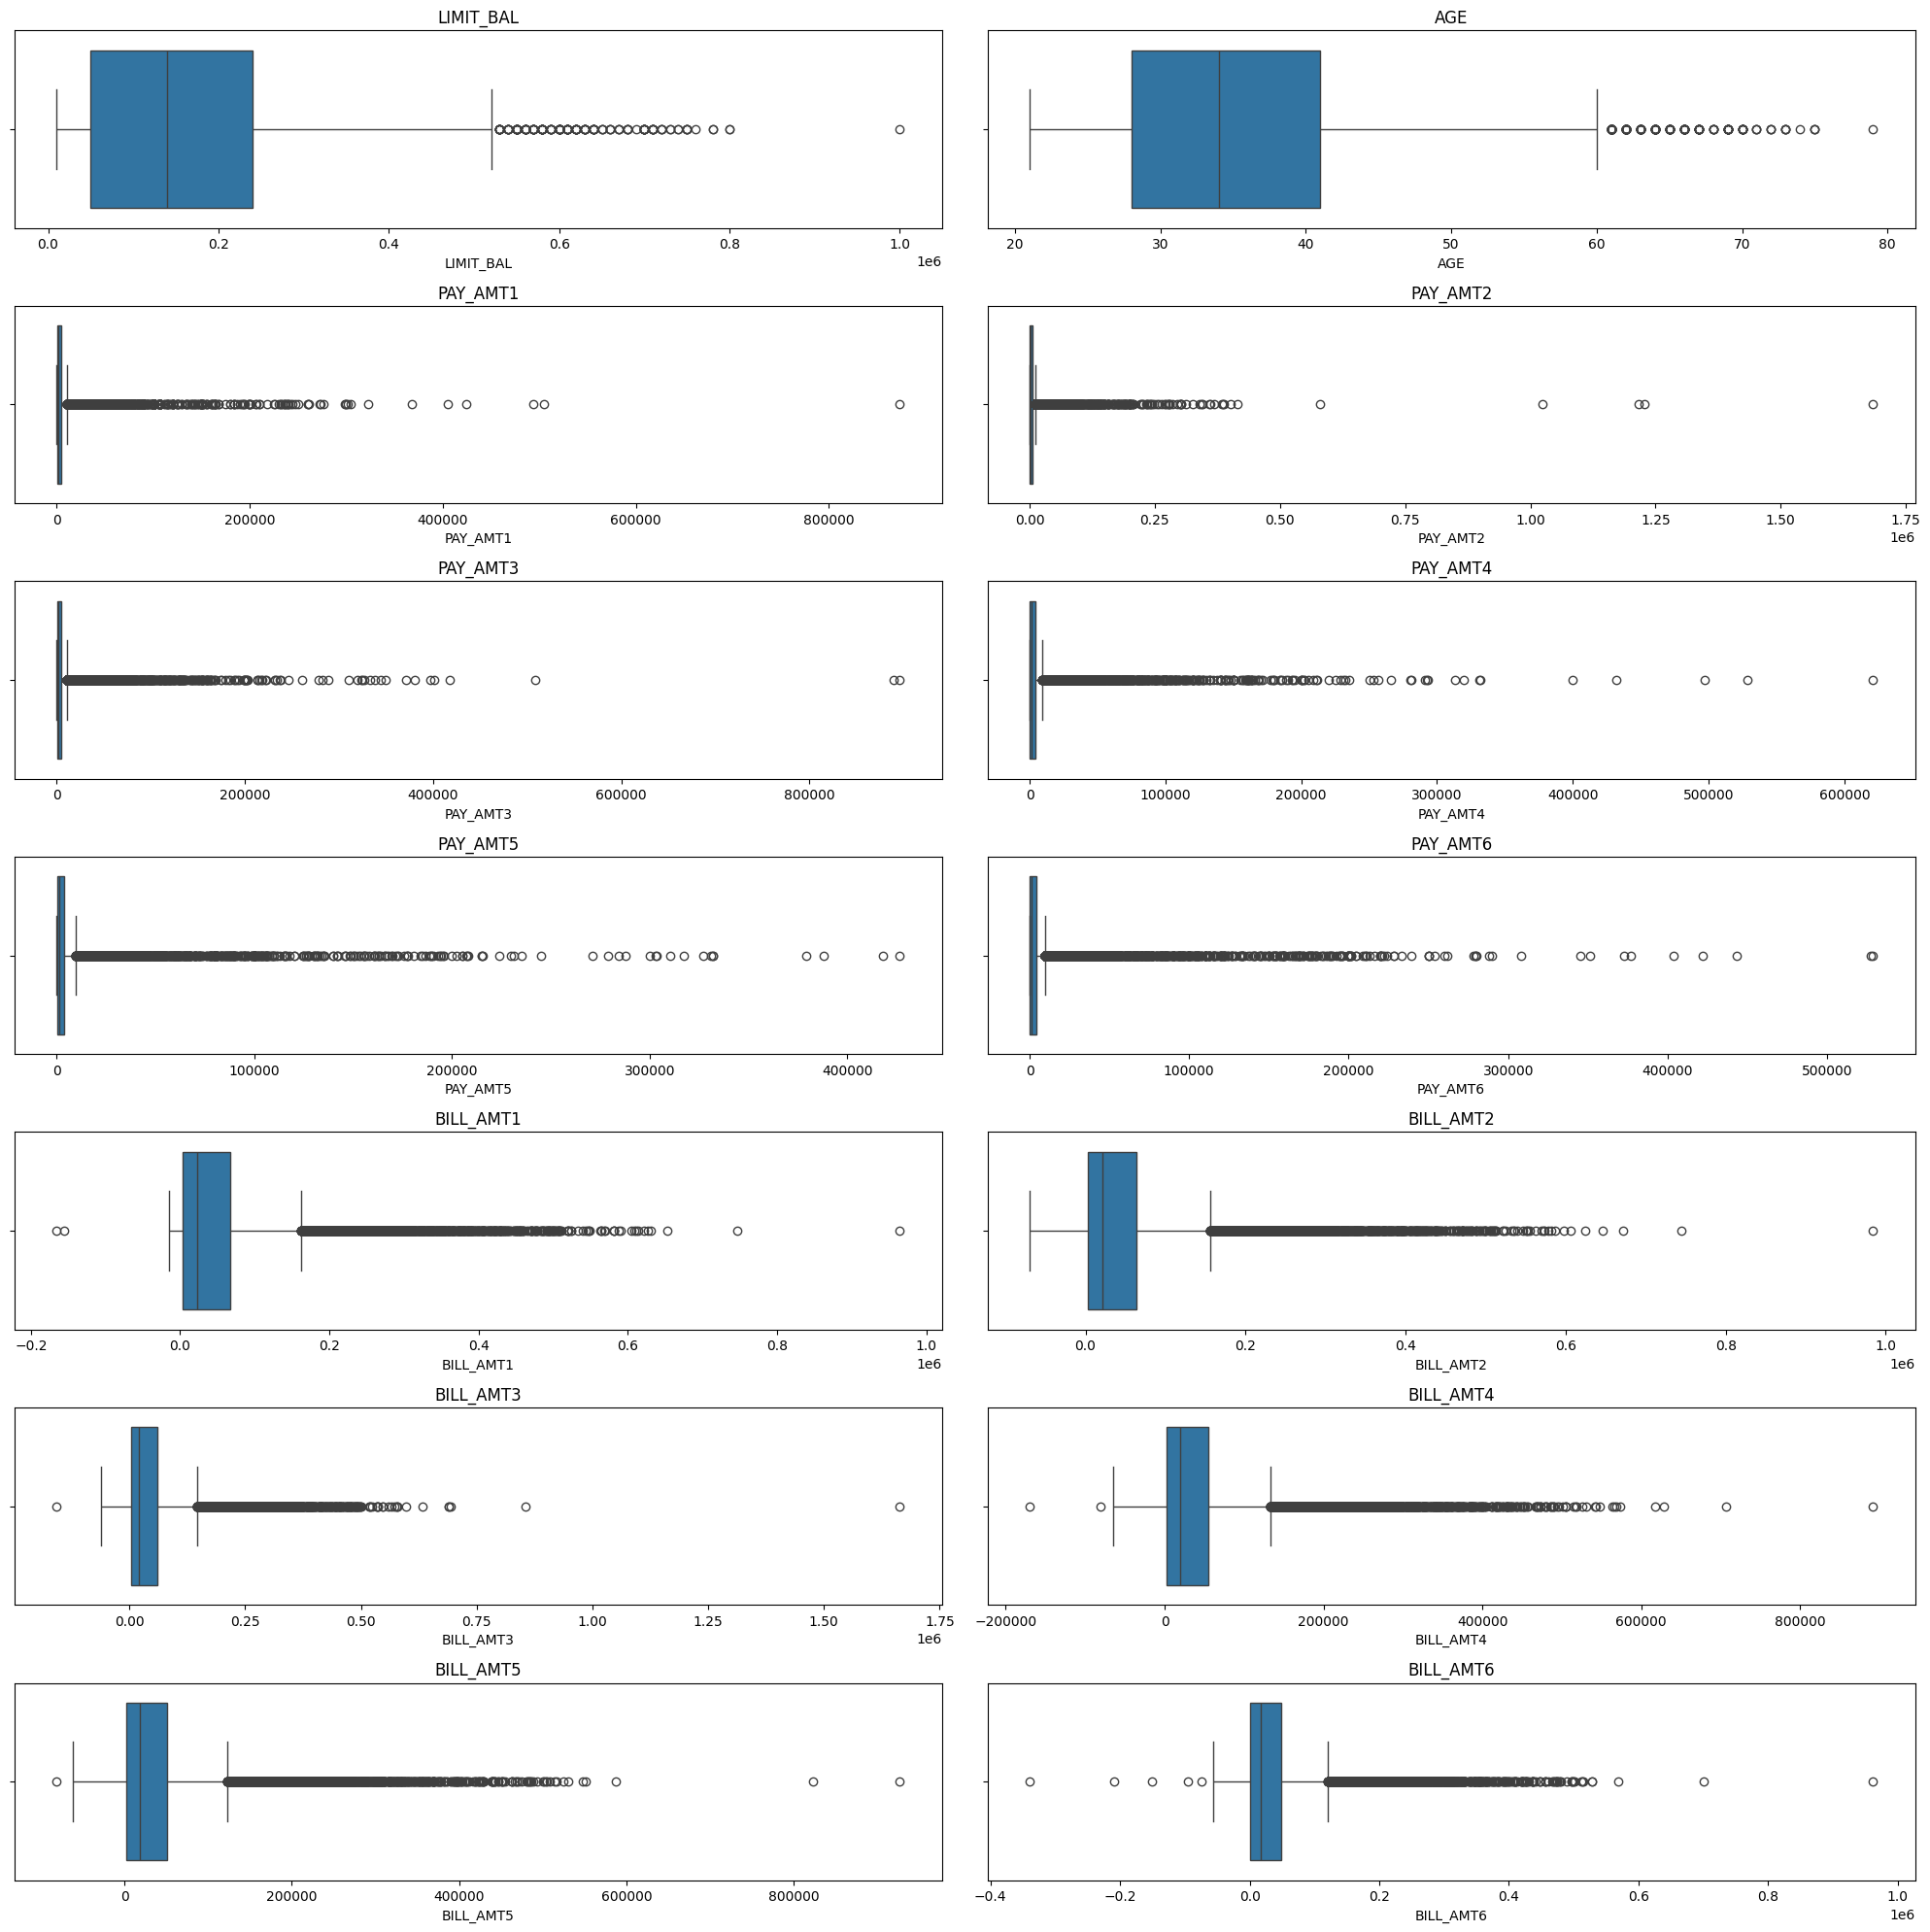

In [23]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(num_cols):
    plt.subplot(7, 2, i + 1)  # Adjust the number of rows and columns as needed
    sns.boxplot(data=df, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()

In [154]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, MinMaxScaler, FunctionTransformer
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [156]:
def log_transform(df):
    skewed_cols = []
    for col in numerical_cols:
        if abs(X[col].skew()) > 1:
            skewed_cols.append(col)
    for col in skewed_cols:
        df[col] = np.log1p(df[col])  
    
    return df

In [170]:
df[numerical_cols].skew() > 1

ID           False
LIMIT_BAL    False
AGE          False
PAY_0        False
PAY_2        False
PAY_3        False
PAY_4        False
PAY_5         True
PAY_6        False
BILL_AMT1     True
BILL_AMT2     True
BILL_AMT3     True
BILL_AMT4     True
BILL_AMT5     True
BILL_AMT6     True
PAY_AMT1      True
PAY_AMT2      True
PAY_AMT3      True
PAY_AMT4      True
PAY_AMT5      True
PAY_AMT6      True
dtype: bool

In [58]:
X = df.drop('Default', axis=1)
y = df['Default']

In [59]:
numerical_cols = X.select_dtypes(np.number).columns
cat_cols = X.select_dtypes('object').columns

In [171]:
num_pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

In [172]:
cat_pipeline = Pipeline(steps=[
    ('enc', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'))
])

In [173]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [161]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp)

In [174]:
log_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(random_state=42))
])

In [175]:
log_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('enc',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('model', LogisticRegression(random_state=42))])

In [142]:
log_pred = log_pipeline.predict(X_val)
print(classification_report(log_pred, y_val))

              precision    recall  f1-score   support

           0       0.68      0.88      0.77      3638
           1       0.67      0.37      0.48      2362

    accuracy                           0.68      6000
   macro avg       0.68      0.63      0.62      6000
weighted avg       0.68      0.68      0.66      6000



In [151]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

In [152]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('enc',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [153]:
rf_pred = rf_pipeline.predict(X_val)
print(classification_report(rf_pred, y_val))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4915
           1       0.47      0.57      0.52      1085

    accuracy                           0.81      6000
   macro avg       0.69      0.72      0.70      6000
weighted avg       0.82      0.81      0.81      6000



In [176]:
rf = RandomForestClassifier(random_state=42)

In [181]:
rf_model = rf_pipeline.named_steps['model']
column_transformer = rf_pipeline.named_steps['preprocessor']

one_hot_encoder = column_transformer.named_transformers_['cat'].named_steps['enc']
feature_names = one_hot_encoder.get_feature_names_out(cat_cols)

all_feature_names = np.concatenate([numerical_cols, feature_names])

<Axes: >

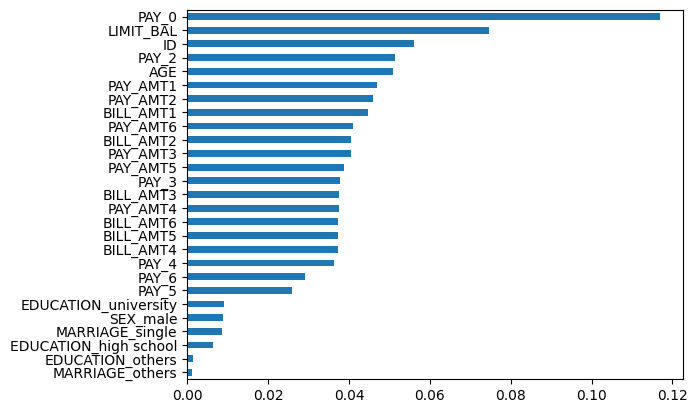

In [183]:
importances = pd.Series(rf_model.feature_importances_, index=all_feature_names)
importances.sort_values().plot(kind='barh')

In [188]:
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance')

,Feature,Importance
MARRIAGE_others,MARRIAGE_others,0.001176
EDUCATION_others,EDUCATION_others,0.001465
EDUCATION_high school,EDUCATION_high school,0.006429
MARRIAGE_single,MARRIAGE_single,0.008658
SEX_male,SEX_male,0.008957
EDUCATION_university,EDUCATION_university,0.009160
PAY_5,PAY_5,0.025960
PAY_6,PAY_6,0.029128
PAY_4,PAY_4,0.036274
BILL_AMT4,BILL_AMT4,0.037201
